<a href="https://colab.research.google.com/github/ElijahMorales04/reu-tribolium-modeling/blob/main/PDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# Define parameters
g = 0.01  # Growth rate
c_ea = 0.003 / 14  # Cannibalism rate of eggs by adults
c_el = 0.0179 / 14  # Cannibalism rate of eggs by larvae
c_pa = 0.008  # Cannibalism rate of pupae by adults
b = 20 / 14  # Birth rate of new eggs
mu_l = 0.000432  # Natural death rate of feeding larvae
mu_a = 0.006  # Natural death rate of adults
s1, s2, s3 = 3, 14, 29  # Stage boundaries (days for simplicity)

# Define discretization
ds = 1  # Discretization step for the stage variable (1 day)
dt = 1  # Discretization step for the time variable (0.01 day)
s = np.arange(0, 29, ds)  # Stage variable array from 0 to 730 days (around 2 years) with step size ds
t = np.arange(0, 1826, dt)  # Time variable array from 0 to 1826 (around 5 years) days with step size dt

# Initialize population densities
p = np.zeros((len(s), len(t)))  # Initialize population density matrix for stages and time
A = np.zeros(len(t))  # Initialize adult population array for time

# Initial conditions: 0 eggs, 0 larvae, 0 pupae, and 50 adults at t = 0
A[0] = 50  # Initial condition for adult population
p[0, 0] = b * A[0]  # Initial condition for eggs at time 0 based on adult population


In [ ]:

# Time-stepping loop
for i in range(len(s) - 1):  # Loop over each time step
    # Boundary conditions

    for n in range(0, len(t) -1 ):  # Loop over each stage, excluding boundaries
       # p[0, n+1] = b * A[n]  # Boundary condition for eggs: new eggs from adults

        integral_s1_s2 = np.sum(p[int(s1/ds):int(s2/ds), n]) * ds  # Integral approximation for feeding larvae
        if s[i] < s1:  # Eggs and early instar larvae
            p[i, n+1] = p[i, n] + dt * 0.01*(-g * (p[i+1, n] - p[i, n]) / ds - c_ea * A[n] - c_el * integral_s1_s2)
            p[i+1,0] = p[i,-1];
        elif s1-1 < s[i] < s2:  # Feeding larvae
            p[i, n+1] = p[i, n] + dt * 0.01*(-g * (p[i+1, n] - p[i, n]) / ds - mu_l * integral_s1_s2)
            p[i+1,0] = p[i,-1];
        elif s2-1 < s[i] < s3:  # Non-feeding larvae, pupae, and callow adults
            p[i, n+1] = p[i, n] + dt *0.01* (-g * (p[i+1, n] - p[i, n]) / ds - c_pa * A[n])
            p[i+1,0] = p[i,-1];
        # Ensure numerical stability
        if p[i, n] < 0:
            p[i, n] = 0
        A[n+1] = A[n] + dt * (g * p[int(s3/ds)-1, n] - mu_a * A[n])  # Update for adult population using ODE
    # Adults ODE


    #p[int(s1/ds), n+1] = p[int(s1/ds), n] + dt * g * p[int(s1/ds), n]  # Boundary condition for feeding larvae: growth rate
    #p[int(s2/ds), n+1] = p[int(s2/ds), n] + dt * g * p[int(s2/ds), n]  # Boundary condition for non-feeding larvae: growth rate


    # Ensure numerical stability
    if A[n+1] < 0:
        A[n+1] = 0

In [ ]:
p[28,0]

0.0

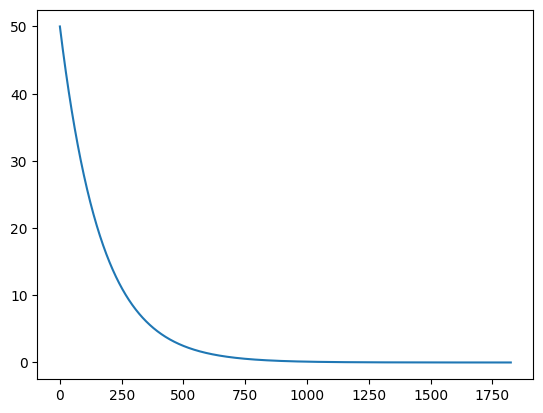

In [ ]:
plt.plot(t,A)

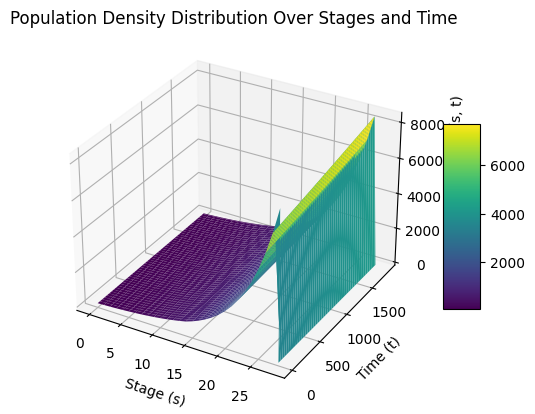

In [ ]:


# Plot results using Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
S, T = np.meshgrid(s, t, indexing='ij')
surf = ax.plot_surface(S, T, p, cmap='viridis')
ax.set_xlabel('Stage (s)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('Population Density p(s, t)')
ax.set_title('Population Density Distribution Over Stages and Time')
plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

# Plot results using Plotly
fig = go.Figure(data=[go.Surface(z=p.T, x=s, y=t)])
fig.update_layout(title='Population Density Distribution Over Stages and Time',
                  scene=dict(xaxis_title='Stage (s)', yaxis_title='Time (t)', zaxis_title='Population Density p(s, t)'),
                  autosize=False, width=800, height=800)
fig.show()